# ASPC-5984 Week 10: Clustering Algorithms

Clustering algorithm is a type of unsupervised learning. It is used to find groups of similar data points in a dataset. Similar to PCA we learned in the previous lecture, clustering algorithm does not require labeled data ($y$ variable). In this note, we will go through two common clustering algorithms: K-means and Gaussian Mixture Model (GMM).

## K-means clustering algorithm

K-means clustering is a simple and popular clustering algorithm. It is a centroid-based algorithm, which means that it tries to find the center of each cluster. The algorithm works iteratively to assign each data point to one of $K$ groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

- The centroids of the $K$ clusters, which can be used to label new data
- Labels for the training data (each data point is assigned to a single cluster)
- The sum of squared distances between data points and their cluster centroids (error)

Let's do the imports needed for this note

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### Toy example

We can simulate a toy example to illustrate the K-means clustering algorithm. We will use the `make_blobs` function from `sklearn.datasets` to generate a dataset with 4 clusters. The `make_blobs` function returns a tuple of `(X, y)`, where `X` is the feature matrix and `y` is the label vector. We will use `X` as the input to the K-means algorithm. Again, `y` is not needed for clustering, it is only used to show the ground truth).

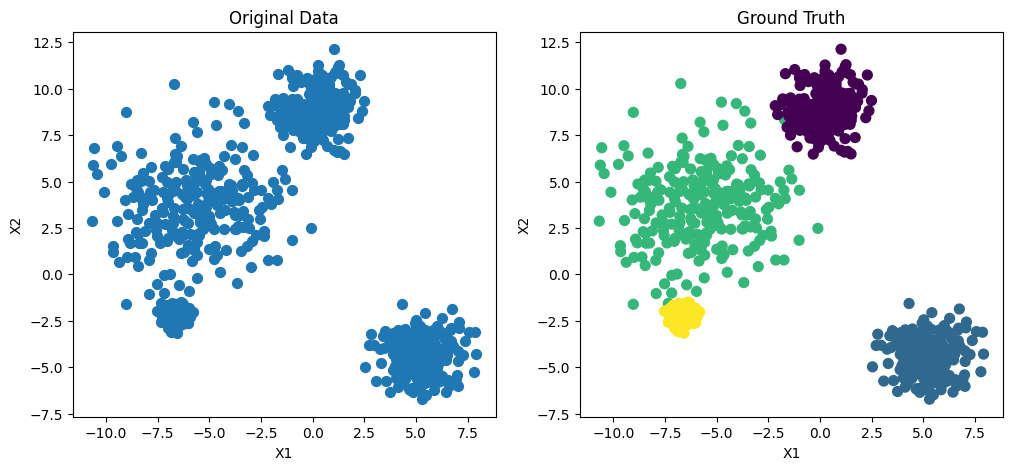

Shape:  (1000, 2)
First 5 rows: 
 [[ 4.94837435 -2.62641531]
 [-4.33052947  4.0674211 ]
 [ 1.07483352 10.90768681]
 [-6.81269994 -1.96056978]
 [-5.74450717  5.52963195]]


In [167]:
N = 1000 # 1000 samples
k = 4 # simulate 4 clusters
p = 2 # 2 features (x1 and x2)

X, y = make_blobs(
        n_samples=N,
        centers=k,
        n_features=p,
        cluster_std=[1, 1, 2, .3],
        random_state=23)

# visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X[:, 0], X[:, 1], s=50)
axes[0].set_title("Original Data")
axes[0].set_xlabel("X1")
axes[0].set_ylabel("X2")
axes[1].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
axes[1].set_title("Ground Truth")
axes[1].set_xlabel("X1")
axes[1].set_ylabel("X2")
plt.show()

# show X
print("Shape: ", X.shape)
print("First 5 rows: \n", X[:5])

### Assumptions

For any algorihtm to work, it is important to understand the assumptions of the algorithm. K-means clustering algorithm assumes that the data is:

- Centroid-based: The data is grouped around a central point, called a centroid
- Distance: The distance is a measure of similarity between data points (e.g. Euclidean distance)

#### Centroids
Centroids are the centeral coordinates of each cluster. We have to provide initial centroids to start the clustering iterations. This step is essential to the model performance as improper initial states may lead to longer converence time or non-convergent results. In our example, as the data size is relatively small and the data structure is clearly defined, we can randomly generate the initial centroids. We randomly select 4 (since we have 4 clusters) data points from the dataset as the initial centroids.

Let's define the visualization function to plot the data points and the centroids.

In [118]:
def vis_centroid(X, centroids, labels=None):
    k = centroids.shape[0]
    colors = plt.get_cmap('plasma')(np.linspace(0, 1, k))

    # plotting
    param_pts = dict(s=80, alpha=.3)
    param_cts = dict(s=250, edgecolor="black")
    plt.figure(figsize=(8, 8))
    # plot points
    if labels is not None:
        plt.scatter(X[:, 0], X[:, 1], c=colors[labels], **param_pts)
    else:
        plt.scatter(X[:, 0], X[:, 1], c="black", **param_pts)
    plt.title("Initial Centroids")
    plt.xlabel("X1")
    plt.ylabel("X2")
    # plot centroids
    for i in range(k):
        plt.scatter(x=centroids[i, 0], y=centroids[i, 1],
                    c=colors[i], label="Centroid {}".format(i),
                    **param_cts)
    plt.legend()

/var/folders/0k/_fn4_dgn04b2b44_sfhbshzr0000gp/T/ipykernel_44564/2033957674.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=centroids[i, 0], y=centroids[i, 1],


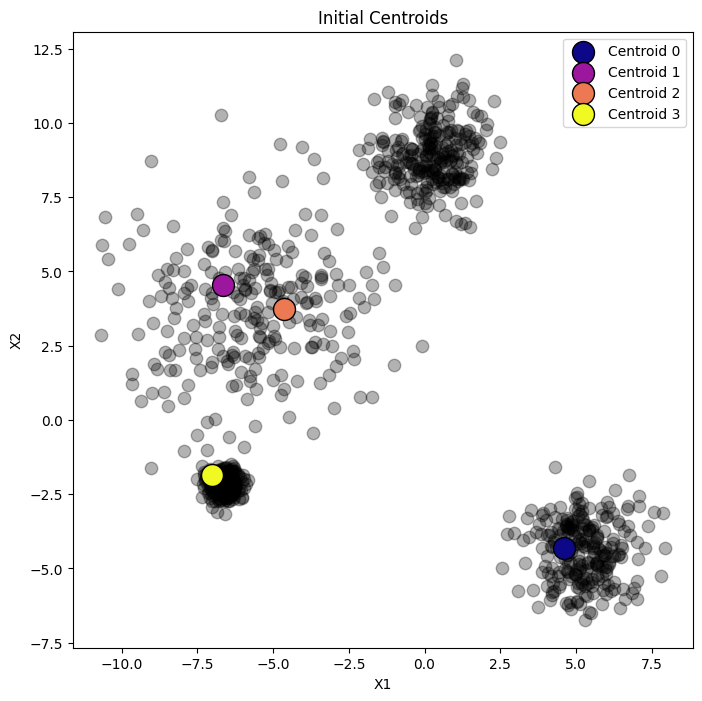

In [103]:
centroids = X[np.random.choice(N, k)] # randomly select k rows from X
vis_centroid(X, centroids)

#### Distance
The distance deviation between the centroids and each data point is another key component in a clustering algorithm. This is a guidance (loss function) for the model to be trained and generate ideal outcomes. For example, if we want to cluster a genetic sequence based on their recombination rates, we have to take genetic distances into consideration when we define the loss function. But again, in this note, we try to keep everything as simple as possible. The distance between data points will be calculated by Euclidean distance.

In [104]:
# define the evaluation function
def euclidean_distance(p1, p2):
    return np.sum((p1 - p2) ** 2) ** .5

# calculate the distance between the first point and the second point
print("the distance is: ", euclidean_distance(X[0], X[1]))

the distance is:  11.441394229246324


### Clustering algorithm
K-Means clustering algorithm consists of two major stages:
- `assignment`
- `update`

Iteratively implementing these two stages will cluster the given datasets based on the defined **distance** function and **centroids**.

#### Assignment stage
In this stage, each point will be assigned to the cluster that has the shortest distance from its centroid.
<center><img src="figures/assignment.png" width="800"/></center>

In [105]:
# create an empty matrix to keep all evaluated distances
distances = np.zeros((N, k))

# iterate through each data point
for i, x in enumerate(X):
    # iterate through each cluster
    for j, center in enumerate(centroids):
        distances[i, j] = euclidean_distance(x, center)

# print the first ten distances
print("Distances:")
print(distances[:10])
print()

# this will return the position of the smallest values
labels = np.argmin(distances, axis=1)

# print the first ten labels
print("Assigned cluster: \n", labels[:10])

Distances:
[[ 1.71295225 13.62564208 11.51152441 11.97966338]
 [12.25013293  2.3566682   0.44575521  6.50893159]
 [15.61913653 10.00064939  9.16205395 15.11547629]
 [11.66212945  6.50558356  6.1061125   0.21631895]
 [14.28204709  1.33183168  2.09899654  7.502354  ]
 [ 9.71234808  4.60940765  2.67565283  5.11447626]
 [13.42456222  1.06552685  1.16512217  6.45948044]
 [10.95499379  6.49000324  5.84954417  0.92729832]
 [11.85702315  6.80154929  6.46373231  0.3842062 ]
 [14.57587668  7.0592439   6.32107827 12.36480417]]

Assigned cluster: 
 [0 2 2 3 1 2 1 3 3 2]


#### Update stage

In this stage, the centroids will be updated based on the mean of the assigned points.

<center><img src="figures/update.png" width="800"/></center>

In [106]:
# create an empty matrix to keep the new centroids
new_centroids = np.zeros((k, 2))

# iterate over each cluster
for i in range(k):
    new_centroids[i] = X[labels == i].mean(axis=0)

# validation
print("New center: \n", new_centroids)

New center: 
 [[ 5.22054811 -4.40112225]
 [-7.19224006  4.59656407]
 [-1.1459894   7.20604541]
 [-6.68645325 -1.98388659]]


/var/folders/0k/_fn4_dgn04b2b44_sfhbshzr0000gp/T/ipykernel_44564/2033957674.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=centroids[i, 0], y=centroids[i, 1],


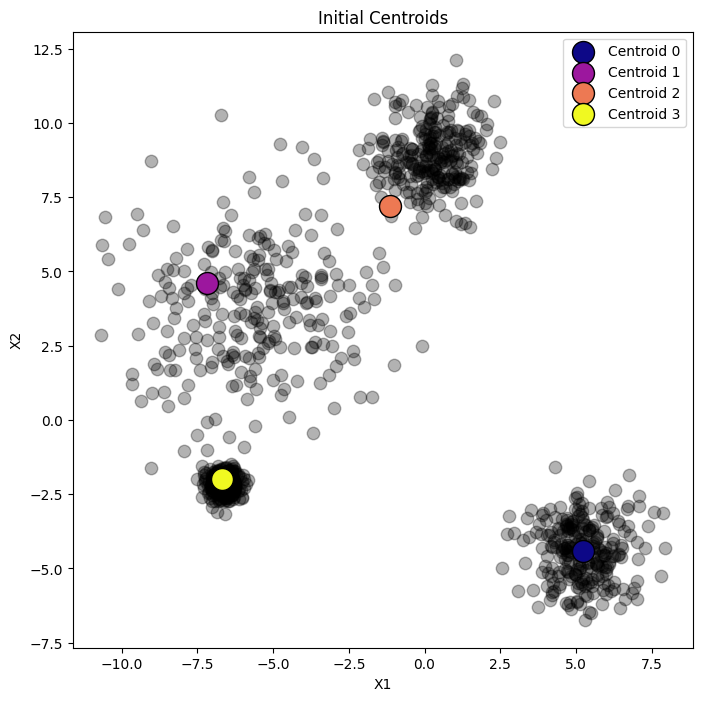

In [107]:
vis_centroid(X, new_centroids)

#### Next assignment stage

After the centroids are updated, we will go back to the assignment stage to re-assign the points to the clusters. This process will be repeated until the centroids do not change anymore.

In [108]:
distances = np.zeros((N, k))
for i, x in enumerate(X):
    for j, center in enumerate(new_centroids):
        distances[i, j] = euclidean_distance(x, center)
new_labels = np.argmin(distances, axis=1)

#### Visulaize the clustering results

/var/folders/0k/_fn4_dgn04b2b44_sfhbshzr0000gp/T/ipykernel_44564/3518542126.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter(x=ct[0], y=ct[1], c=colors[j], **param_ct)
/var/folders/0k/_fn4_dgn04b2b44_sfhbshzr0000gp/T/ipykernel_44564/3518542126.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter(x=pt[:, 0], y=pt[:, 1], c=colors[j], **param_pt, label="Cluster {}".format(j))


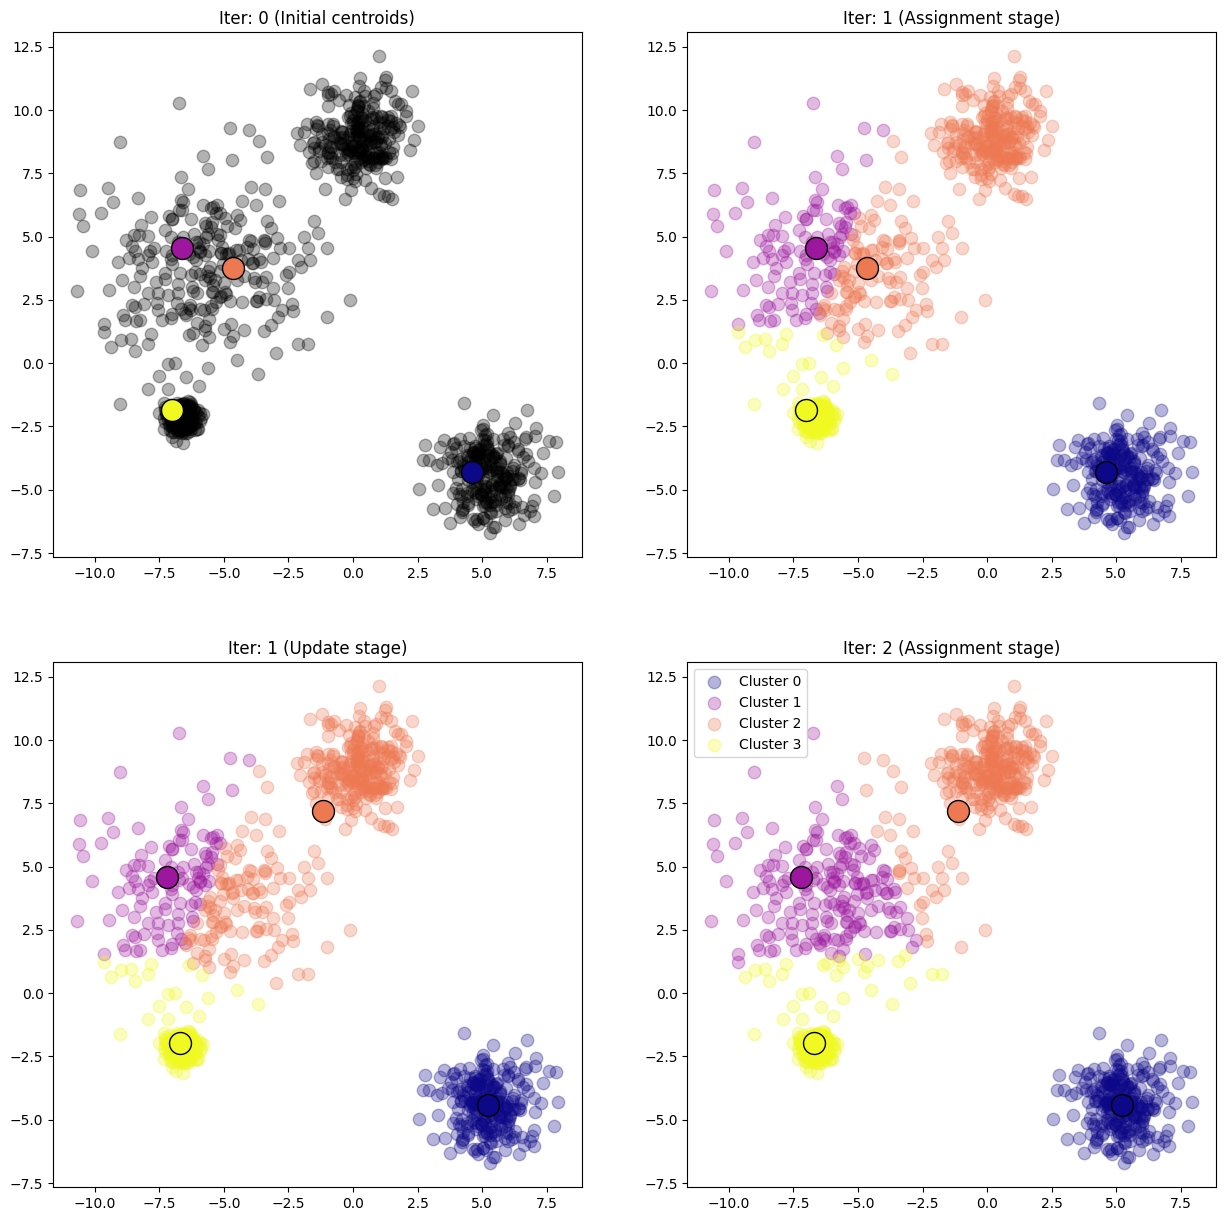

In [110]:
# inner loop
# viridis, plasma, inferno, magma, cividis
colors = plt.get_cmap('plasma')(np.linspace(0, 1, k))
param_pt = dict(s=80, alpha=.3)
param_ct = dict(s=250, edgecolor="black")

# outer loop
titles = ["Iter: 0 (Initial centroids)",
          "Iter: 1 (Assignment stage)",
          "Iter: 1 (Update stage)",
          "Iter: 2 (Assignment stage)"]
ls_data = [[X[labels == i] for i in range(k)],
           [X[labels == i] for i in range(k)],
           [X[labels == i] for i in range(k)],
           [X[new_labels == i] for i in range(k)]]
ls_cts  = [centroids,
           centroids,
           new_centroids,
           new_centroids]

# create a new figure
fig = plt.figure(figsize=(15, 15))
# iterate over subplots
for (i, title, pts, cts) in zip(range(4), titles, ls_data, ls_cts):
    axis = fig.add_subplot(2, 2, i + 1)
    axis.set_title(title)
    # iterate over clusters
    for (j, pt, ct) in zip(range(k), pts, cts):
        if i == 0:
            axis.scatter(x=pt[:, 0], y=pt[:, 1], c="black", **param_pt)
        else:
            axis.scatter(x=pt[:, 0], y=pt[:, 1], c=colors[j], **param_pt, label="Cluster {}".format(j))
        axis.scatter(x=ct[0], y=ct[1], c=colors[j], **param_ct)
axis.legend(loc='upper left')

#### Put things together
We can collect all code blocks and put them into one signle function `kmeans(X, k)`, where `X` is a 2D matrix in a shape of `(n, p)`, and `k` is the number of clusters.

<center><img src="figures/kmeans.png" width="600"/></center>

In [111]:
def init_center(X, k):
    n = X.shape[0]
    return X[np.random.choice(n, k)]

def assignment(X, centroids):
    N, k = X.shape[0], centroids.shape[0]
    distances = np.zeros((N, k))
    for i, x in enumerate(X):
        for j, center in enumerate(centroids):
            distances[i, j] = euclidean_distance(x, center)
    return np.argmin(distances, axis=1)

def update(X, labels, k):
    N, p = X.shape
    centroids = np.zeros((k, p))
    for i in range(k):
        centroids[i] = X[labels == i].mean(axis=0)
    return centroids

def kmeans(X, k, max_iter=10):
    centroids = init_center(X, k)
    for i in range(max_iter):
        labels = assignment(X, centroids)
        centroids = update(X, labels, k)
    return centroids, labels

In [152]:
centroids, labels = kmeans(X=X, k=4, max_iter=10)

print("Centroids: \n", centroids)
print("Labels: \n", labels)

Centroids: 
 [[-5.69636389  3.96446855]
 [ 5.22054811 -4.40112225]
 [ 0.15275043  8.87221527]
 [-6.68493063 -1.97354619]]
Labels: 
 [1 0 2 3 0 0 0 3 3 2 2 2 0 1 1 3 3 3 1 1 2 3 3 3 2 2 3 1 2 2 2 0 1 1 0 3 3
 3 0 3 2 1 1 3 0 0 2 1 0 3 3 3 0 3 2 3 2 2 3 1 2 2 3 0 3 0 1 1 1 3 0 2 2 1
 0 0 2 1 0 3 2 3 0 0 2 2 1 3 3 0 2 1 0 2 3 2 1 1 0 1 0 3 0 3 1 0 3 1 0 0 2
 1 0 1 0 0 3 0 3 1 2 3 1 3 1 3 2 0 2 1 3 0 2 3 0 1 1 3 0 3 1 2 2 3 3 1 1 0
 1 1 2 1 2 2 0 1 3 1 3 2 0 3 2 3 0 0 1 2 0 1 3 1 0 1 2 3 2 2 0 3 1 1 1 3 0
 3 2 0 0 1 1 3 1 3 1 0 0 2 0 1 1 2 3 3 2 2 0 2 0 2 2 0 2 3 2 2 0 3 2 1 3 3
 2 3 2 0 2 3 3 0 2 3 3 0 0 1 0 1 0 3 2 1 2 3 3 0 3 0 0 1 2 3 1 2 3 0 2 3 2
 0 1 0 3 2 1 1 3 2 2 0 3 0 2 3 1 0 2 1 1 0 3 1 1 2 1 0 1 3 2 2 1 2 2 1 0 0
 1 0 2 1 3 3 0 3 1 3 2 0 1 2 2 1 2 2 0 0 1 2 3 3 2 3 2 1 1 2 3 0 1 0 1 1 2
 0 2 1 2 2 0 2 2 0 2 0 0 3 2 2 1 3 3 1 2 3 3 1 1 2 1 3 0 1 2 0 1 0 0 1 1 2
 1 0 3 0 0 3 1 2 3 1 1 2 0 0 0 0 0 2 2 3 2 1 0 0 0 0 2 2 0 1 1 1 3 2 2 1 3
 1 2 1 0 0 2 3 3 3 2 1 3 3 0 0 1 0 0 1 3 1 

/var/folders/0k/_fn4_dgn04b2b44_sfhbshzr0000gp/T/ipykernel_44564/3506133256.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=centroids[i, 0], y=centroids[i, 1],


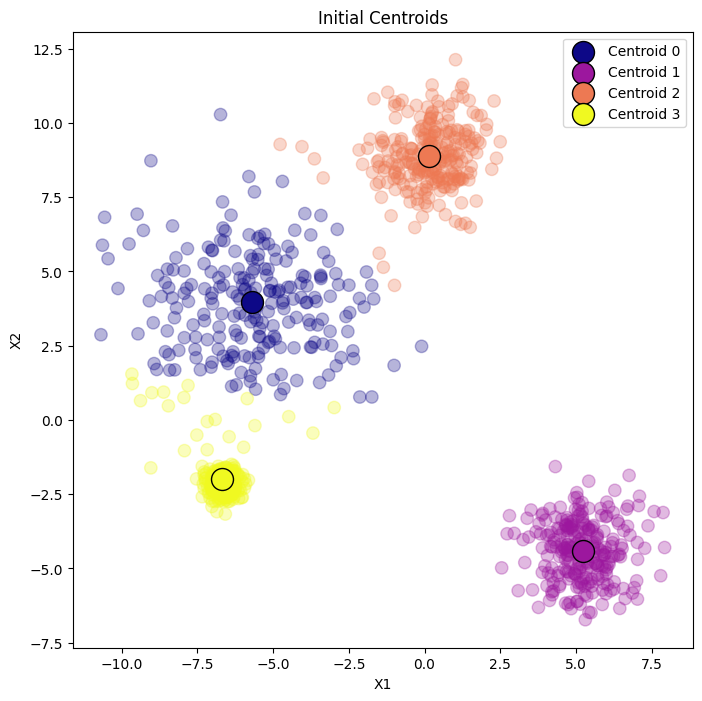

In [153]:
vis_centroid(X, centroids, labels)

## Gaussian Mixture Model (GMM)

Gaussian mixture model (GMM) is another approach to cluster a given dataset. Unlike K-means clustering algorithm, which has no assumption on the cluster distribution, GMM assumes each cluster following a multivariate normal (MVN) distribution. This approach is useful when the observed data shows different variation across the studied dimensions (variates). Ones can implement GMM by Expectation Maximization (EM) algorithm that leverages Bayesian Theorm to maximize the posterior probability. The posterior probability in GMM is the chance the observed data is sampled from the estiamted MVN distributions.

In this section, we will walk through each step of EM algorithm, and we will then compare the results generated from K-Means and GMM clustering approaches.

### Bayesian Theorm
First, let's recap what Bayesian theorm is about:
$$
    P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}
    \tag{1}
$$

The theorm tells us, with the prior $P(A)$ and the conditional probability $P(B \mid A)$, we can estimate the posterior probability $P(A \mid B)$.

### Priors
So what is the prior? In our case, the prior is how many data points are sampled from the distribution $c_j$.
It can be expressed as:

$$
    \begin{split}
        P(A) &= P(c_{j}) = P(\mu_{j}, \Sigma_{j})  =\pi_{j}\\
    \end{split}
    \tag{2}
$$

where $\mu_j$ and $\Sigma_j$ are the mean and (co)variance of the distribution $c_j$, respectively.


In [125]:
# parameters
N = 1000
k = 4

# randomly assign clusters (labels)
# use "quotients" as the initial labels
labels = np.random.random(N) // (1 / k)
pi     = [np.mean(labels == i) for i in range(k)]
print("labels:\n", labels[:10])
print("pi:\n", pi)
print()

# subset data by each cluster
ls_subdata = [X[labels == i]        for i       in range(k)]
ls_mu      = [np.mean(subdata, axis=0) for subdata in ls_subdata]
ls_sigma   = [np.cov(subdata.T)        for subdata in ls_subdata]
for i in range(4):
    print("mu_%d:\n"    % (i + 1), ls_mu[i])
    print("sigma_%d:\n" % (i + 1), ls_sigma[i])

labels:
 [3. 0. 2. 1. 3. 2. 0. 1. 1. 1.]
pi:
 [0.268, 0.244, 0.247, 0.241]

mu_1:
 [-1.42713423  1.59217489]
sigma_1:
 [[24.19704121 -4.72919973]
 [-4.72919973 29.49682438]]
mu_2:
 [-1.99330841  1.30594863]
sigma_2:
 [[25.23252738 -5.1279439 ]
 [-5.1279439  27.51269744]]
mu_3:
 [-1.88033343  1.5926625 ]
sigma_3:
 [[24.68587121 -3.26875343]
 [-3.26875343 27.79658371]]
mu_4:
 [-1.63349779  1.59911834]
sigma_4:
 [[24.64548703 -3.94090758]
 [-3.94090758 30.07400504]]


### Probability density function
Then, we can define $P(B)$ and $P(B \mid A)$ in the EM algorithm.
$P(B)$ describes how likely the sample $x_i$ is observed.
To calculate $P(B)$, we have to consider all the possible distributions:

$$
    \begin{split}
        P(B) &= P(x_{i}) = {\sum \limits_{j=1}^{k} P(x_{i} \mid c_{j}) P(c_{j})} \\
    \end{split}
    \tag{3}
$$

where $k$ is the total nubmer of possible distributions (i.e., clusters).

<center><img src="figures/pdf.png" width="600"/></center>

Finally, we need to calculate $P(B \mid A)$ to know $P(B)$.
$P(B \mid A)$ describes that how typical the data $x_i$ is sampled from the distribution $c_j$. This can be calculated by the probability density function (PDF) of a multivariate distribution:

$$
    \begin{split}
        P(B \mid A) &= P(x_{i} \mid c_{j}) \\
                    &= P(x_{i} \mid \mu_{j}, \Sigma_{j}) \\
                    &= \frac{1}{\sqrt{det(2\pi\Sigma_{j})}} \exp({-\frac{1}{2}(x_{i}-\mu_{j})^T\Sigma_{j}^{-1}(x_{i}-\mu_{j})})
    \end{split}
    \tag{4}
$$


In [142]:
from scipy.stats import multivariate_normal as mvn

mvn(mean=0, cov=1).pdf(0)

0.3989422804014327

In [143]:
mvn(mean=[10, 20],
    cov=[[10, 5],
        [5, 25]]).pdf([10, 20])

0.010610329539459696

### Expectation Stage (E Stage)
Now, based on the Bayesian theorm, we have everything we need to calculate the posterior probability

$$
    \begin{split}
        P(A \mid B)
            &= \frac{P(B \mid A)P(A)}{P(B)} \\ \\
            &= P(c_{j} \mid x_{i}) \\ \\
            &= \frac{P(x_{i} \mid c_{j})P(c_{j})}{{\sum \limits_{j=1}^{k} P(x_{i} \mid c_{j}) P(c_{j})}} = r_{ij}
    \end{split}
    \tag{5}
$$

In [144]:
def calculate_R(X, pi, mu, sigma):
    """Calculate posterior probability, P(xi|cj)

    Parameters
    ----------
    X : array_like
        A NumPy array with a shape of (n, p),
        where n is the number of observations,
        and p is the data dimension.
    pi : array_like
        A NumPy array with a shape of (k,).
        Prior, P(A).
    mu : array_like
        A Numpy array with a shape of (k, p)
        The mean of the inspected MVN distribution
    sigma : array_like
        A Numpy array with a shape of (k, p, p)
        The covariance of the inspected MVN distribution

    Returns
    -------
    array_like, a NumPy array with a shape of (n, k),
    where n is the number of observations,
    and k is the number of clusters.
    """
    # create an empty R matrix
    n, k = len(X), len(mu)
    R = np.zeros((n, k))
    # numerator
    for i in range(k):
        R[:, i] = pi[i] * mvn(mean=mu[i],
                              cov=sigma[i]).pdf(X)
    # denominator
    R /= np.sum(R, axis=1)[:, None]
    return R

# Validation ---
R = calculate_R(X, pi, ls_mu, ls_sigma)
print(R[:10, ])
print(R.shape)

[[0.28676534 0.24510259 0.22996913 0.23816294]
 [0.26224563 0.2505356  0.25241892 0.23479985]
 [0.291419   0.19023225 0.24912084 0.26922791]
 [0.24066621 0.26415756 0.26187045 0.23330578]
 [0.26039576 0.25293733 0.25165053 0.23501639]
 [0.26204529 0.25221031 0.25201201 0.23373239]
 [0.25818086 0.2551667  0.25312479 0.23352766]
 [0.24446076 0.26249943 0.25953212 0.23350769]
 [0.23900197 0.26438467 0.26289059 0.23372277]
 [0.28371084 0.21370397 0.24806042 0.25452477]]
(1000, 4)


### Maximization Stage (M Stage)
In the M stage, we need to update the hypothesis $\theta$ to maximize the likelihood, $\ell(\theta)$. The hypothesis includes the prior $P(c_j)$, the mean $\mu_j$, and the coariance $\Sigma_j$ for the distribution $j$. To do this, we can use the posterior probability $r_{ij}$ to assign weight to each observation.

$$
    \begin{split}
        P(c_{j})&= \frac{\sum \limits_{i=1}^{n} r_{ij}}
                                   {\sum \limits_{j=1}^{k}\sum \limits_{i=1}^{n} r_{ij}}\\\\
        \mu_{j} &= \frac{\sum \limits_{i=1}^{n} r_{ij}x_i}
                        {\sum \limits_{i=1}^{n} r_{ij}}\\\\
        \Sigma_{j} &= \frac{\sum \limits_{i=1}^{n} r_{ij}(x_i - \mu_j)^T(x_i - \mu_j)}
                           {\sum \limits_{i=1}^{n} r_{ij}}\\
    \end{split}
$$

In [145]:
def update_pi(R):
    return R.mean(axis=0)

def update_mu(R, X):
    n, k = R.shape
    new_mu = [0] * k
    for j in range(k):
        num = np.sum(X * R[:, j][:, None], axis=0)
        den = np.sum(R[:, j])
        new_mu[j] = num / den
    return new_mu

def update_sigma(R, X, mu):
    n, k = R.shape
    new_sigma = [0] * k
    for j in range(k):
        # weighted mean squared devication
        weighted_MSD = [np.matmul((x - mu[j])[:, None], (x - mu[j])[:, None].T) * r for x, r in zip(X, R[:, j])]
        new_sigma[j] = np.sum(weighted_MSD, axis=0) / np.sum(R[:, j])
    return new_sigma

### Maximum likelihood estimation

$$
    \begin{split}
        arg \max_{\theta} \ell(\theta)
            &= arg \max_{\theta} \ln \prod\limits_{i=1}^{n} P(x_i \mid \theta) \\
            &= arg \max_{\theta} \sum \limits_{i=1}^{n} \ln P(x_i \mid \theta) \\
            &= arg \max_{\theta} \sum \limits_{i=1}^{n} \ln \sum \limits_{j=1}^{k} P(x_i \mid c_j) P(c_j)
    \end{split}
$$

where
$$
    \theta = [c_1,...,c_k, P(c_1), ..., P(c_k)]
$$

In [173]:
def get_ll(X, pi, mu, sigma):
    n = len(X)
    k = len(pi)
    mat_ll = np.zeros((n, k))
    for i in range(n):
        for j in range(k):
            mat_ll[i, j] = mvn(mu[j], sigma[j]).pdf(X[i]) * pi[j]
    ll = np.log(np.sum(mat_ll, axis=1)).sum()
    return ll

### Put things together
We have defined everything we need in EM algorithm. Now, let's try to put code blocks into one single function. You will need:
* `init_states(X, k)` returns $\mu$, $\Sigma$, and $pi$
* `calculate_R(X, pi, mu, sigma)` returns $P(cj|xi)$
* `update_pi(R)` returns $P(c_j)$
* `update_mu(R, X)` returns updated $\mu$
* `update_sigma(R, X, mu)` returns updated $\Sigma$

<center><img src="figures/gmm.png?" width="600"/></center>

In [185]:
def gmm(X, k, max_iter=10):
    n, p = X.shape
    # initialize parameters
    pi = np.ones(k) / k
    mu = init_center(X, k)
    sigma = np.array([np.eye(p)] * k)
    # EM algorithm
    for i in range(max_iter):
        R = calculate_R(X, pi, mu, sigma)
        pi = update_pi(R)
        mu = update_mu(R, X)
        sigma = update_sigma(R, X, mu)
        ll = get_ll(X, pi, mu, sigma)
        print("Iteration: {}, log-likelihood: {}".format(i + 1, ll))
    # return
    return dict(labels=R.argmax(axis=1),
                mu=np.array(mu), sigma=sigma, ll=ll)

In [193]:
gmm_out = gmm(X, k=4, max_iter=10)

Iteration: 1, log-likelihood: -4736.002631144234
Iteration: 2, log-likelihood: -4696.502104428775
Iteration: 3, log-likelihood: -4664.289834545289
Iteration: 4, log-likelihood: -4627.534614199618
Iteration: 5, log-likelihood: -4562.13504092847
Iteration: 6, log-likelihood: -4503.318045959472
Iteration: 7, log-likelihood: -4431.5350480646375
Iteration: 8, log-likelihood: -4327.587655764468
Iteration: 9, log-likelihood: -4185.221132762757
Iteration: 10, log-likelihood: -4001.419621571733


## K-menas vs GMM

### GMM

/var/folders/0k/_fn4_dgn04b2b44_sfhbshzr0000gp/T/ipykernel_44564/3506133256.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=centroids[i, 0], y=centroids[i, 1],


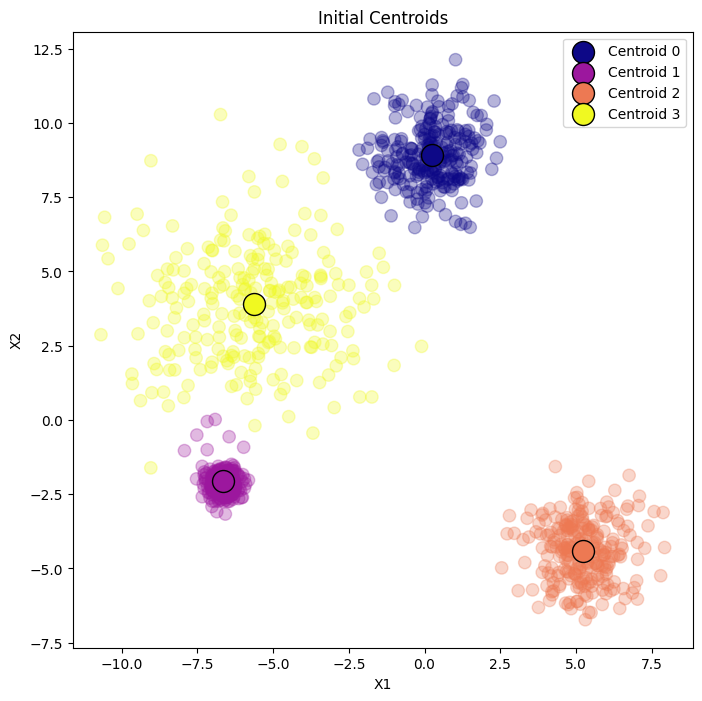

In [194]:
vis_centroid(X, gmm_out["mu"], gmm_out["labels"])

### K-means

/var/folders/0k/_fn4_dgn04b2b44_sfhbshzr0000gp/T/ipykernel_44564/3506133256.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=centroids[i, 0], y=centroids[i, 1],


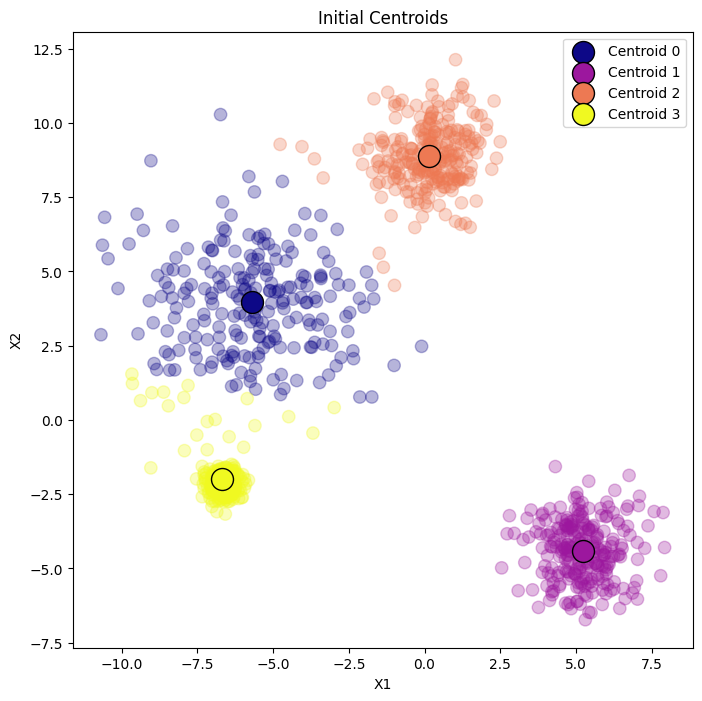

In [190]:
vis_centroid(X, centroids, labels)

### Ground truth

/var/folders/0k/_fn4_dgn04b2b44_sfhbshzr0000gp/T/ipykernel_44564/3506133256.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=centroids[i, 0], y=centroids[i, 1],


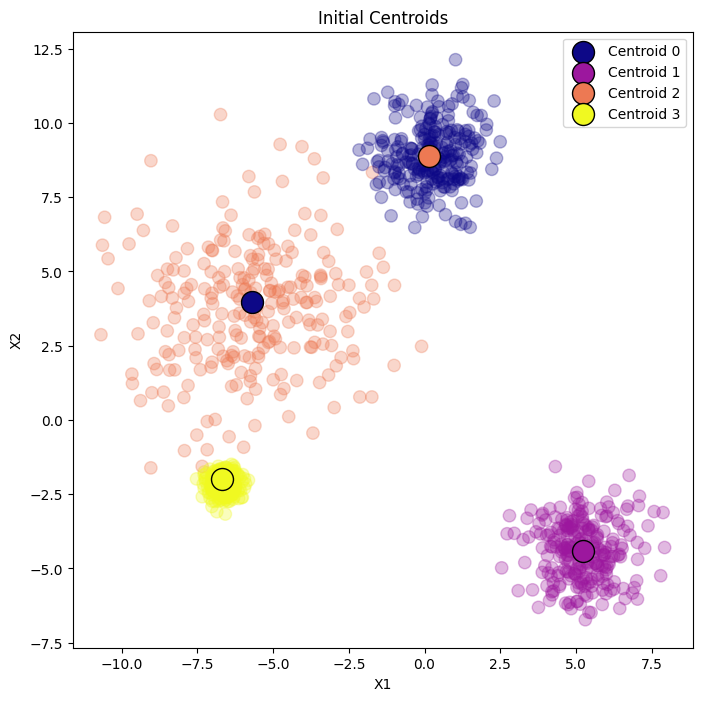

In [195]:
vis_centroid(X, centroids, y)